# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


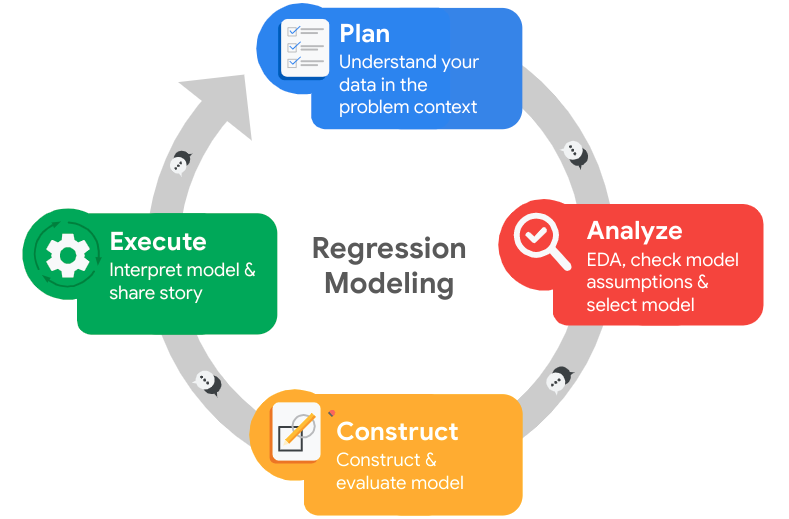

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import base packages
import pandas as pd
import numpy as np
import pickle

#import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import modeling packages
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from xgboost import plot_importance

# Import model classifiers
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Basic Info
- 8 numerical columns
- 2 categorical columns
- 0 null values.

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'satisfaction_level':'satisfaction',
                           'number_project':'project',
                           'average_montly_hours':'average_hours',
                           'time_spend_company':'years_worked',
                           'Work_accident':'accident',
                           'promotion_last_5years':'promotion',
                           'Department':'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction', 'last_evaluation', 'project', 'average_hours',
       'years_worked', 'accident', 'left', 'promotion', 'department',
       'salary'],
      dtype='object')

### Check duplicates

Check for any duplicate entries in the data.

In [7]:
# Check for duplicates
df0.duplicated().sum()

3008

In [8]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction,last_evaluation,project,average_hours,years_worked,accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates().reset_index(drop = True)

# Display information on the new dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   satisfaction     11991 non-null  float64
 1   last_evaluation  11991 non-null  float64
 2   project          11991 non-null  int64  
 3   average_hours    11991 non-null  int64  
 4   years_worked     11991 non-null  int64  
 5   accident         11991 non-null  int64  
 6   left             11991 non-null  int64  
 7   promotion        11991 non-null  int64  
 8   department       11991 non-null  object 
 9   salary           11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


### Check outliers

Check for outliers in the data.

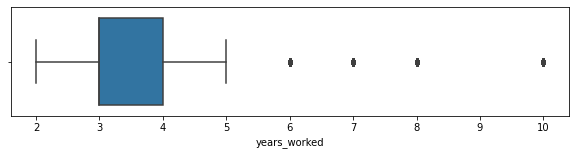

In [10]:
# Create a boxplot to visualize distribution of years worked and detect any outliers
plt.figure(figsize = (10, 2))
sns.boxplot(x = df1['years_worked']);


In [11]:
# Determine the number of rows containing outliers
(df1['years_worked'] > 5).sum()

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [12]:
# Get numbers of people who left vs stayed
print('Number Stayed:', df1['left'].value_counts()[0])
print('Number Left:', df1['left'].value_counts()[1])

# Get percentages of people who left vs stayed
print('Percent Stayed:', round(df1['left'].value_counts(normalize = True)[0], 3))
print('Percent Left:', round(df1['left'].value_counts(normalize = True)[1], 3))

Number Stayed: 10000
Number Left: 1991
Percent Stayed: 0.834
Percent Left: 0.166


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

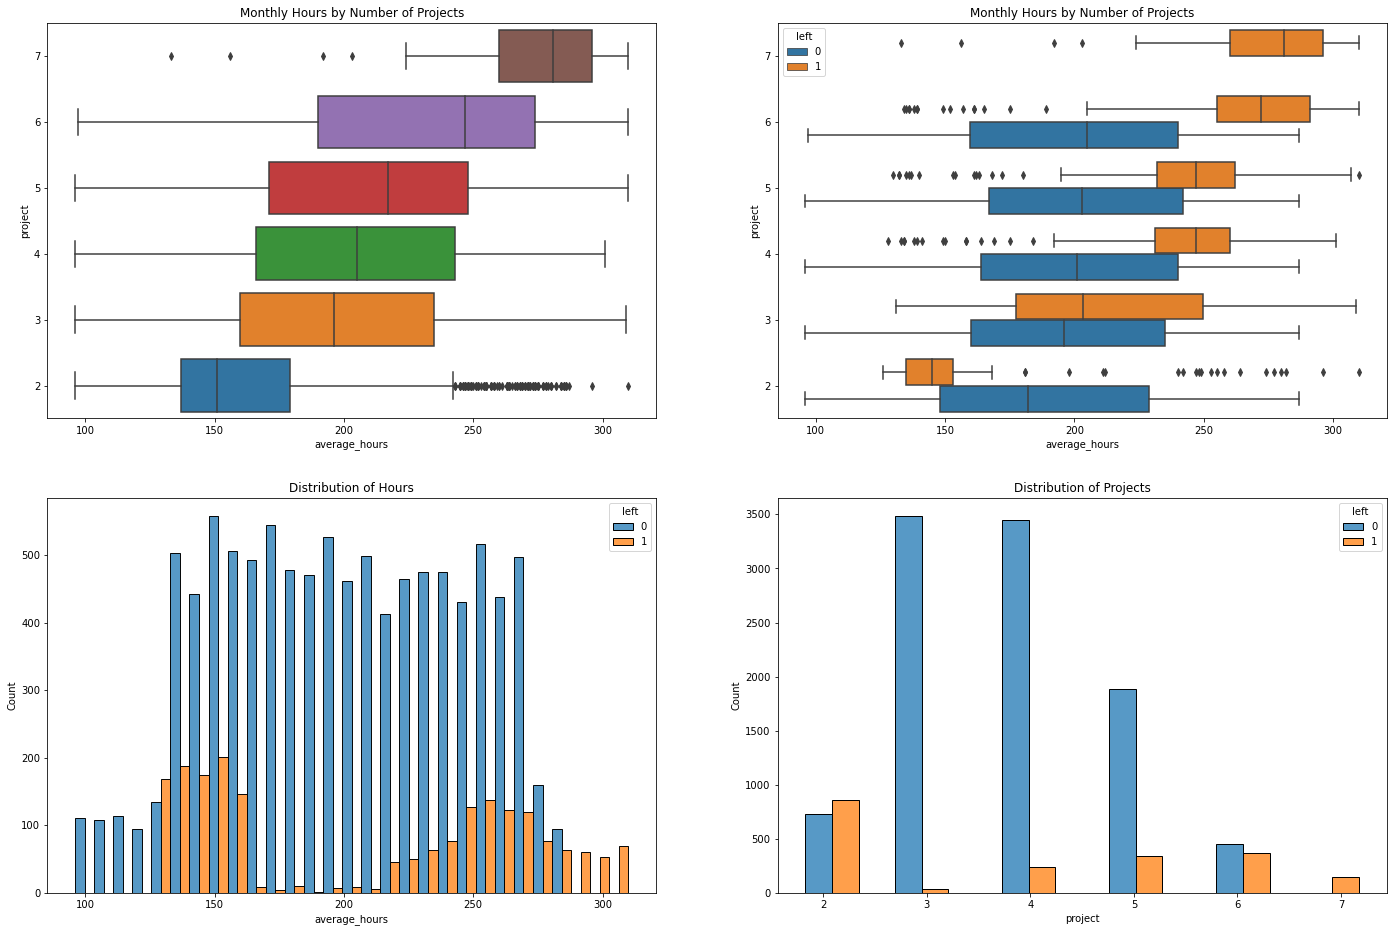

In [13]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize = (24, 16))

# Graph average monthly hours by number of projects
sns.boxplot(data = df1, y = 'project', x = 'average_hours', orient = 'horizontal', ax = axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Monthly Hours by Number of Projects')

# Graph average monthly hours by number of projects comparing who left vs who stayed
sns.boxplot(data = df1, y = 'project', x = 'average_hours', hue = 'left', orient = 'horizontal', ax = axes[0, 1])
axes[0, 1].invert_yaxis()
axes[0, 1].set_title('Monthly Hours by Number of Projects')

# Graph the distribution of average monthly hours comparing who left vs who stayed
sns.histplot(data = df1, x = 'average_hours', hue = 'left', multiple = 'dodge', ax = axes[1, 0])
axes[1, 0].set_title('Distribution of Hours');

# Graph the distribution of projects comparing who left vs who stayed
sns.histplot(data = df1, x = 'project', hue = 'left', multiple = 'dodge', shrink = 3,  ax = axes[1, 1])
axes[1, 1].set_title('Distribution of Projects');

Text(0.5, 1.0, 'Distribution of Salary by Years Worked')

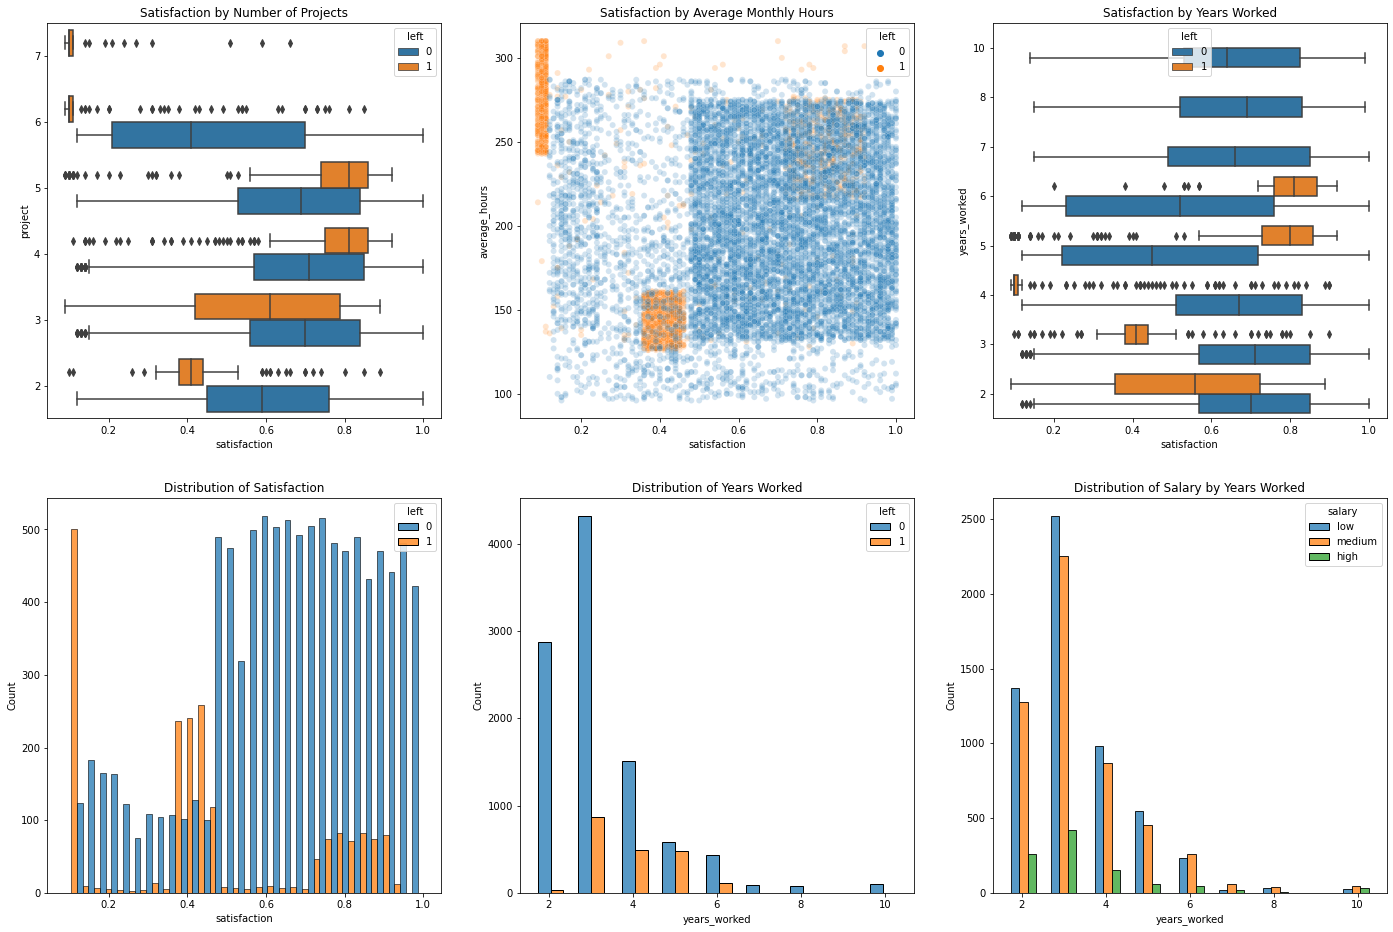

In [14]:
# Create a plot as needed
fig, axes = plt.subplots(2, 3, figsize = (24, 16))

# Graph satisfaction by number of projects comparing who left vs who stayed
sns.boxplot(data = df1, x = 'satisfaction', y = 'project', orient = 'horizontal', hue = 'left', ax = axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Satisfaction by Number of Projects')

# Graph satisfaction by average hours comparing who left vs who stayed
sns.scatterplot(data = df1, x = 'satisfaction', y = 'average_hours', hue = 'left', ax = axes[0, 1], alpha = 0.2)
axes[0, 1].set_title('Satisfaction by Average Monthly Hours')

# Graph satisfaction by years worked comparing who left vs who stayed
sns.boxplot(data = df1, x = 'satisfaction', y = 'years_worked', hue = 'left', orient = 'horizontal', ax = axes[0, 2])
axes[0, 2].invert_yaxis()
axes[0, 2].set_title('Satisfaction by Years Worked')

# Graph distribution of satisfaction comparing who left vs who stayed
sns.histplot(data = df1, x = 'satisfaction', multiple = 'dodge', hue = 'left', ax = axes[1, 0])
axes[1, 0].set_title('Distribution of Satisfaction')

# Graph distribution of years worked comparing who left vs who stayed
sns.histplot(data = df1, x = 'years_worked', multiple = 'dodge', shrink = 7, hue = 'left', ax = axes[1, 1])
axes[1, 1].set_title('Distribution of Years Worked')

# Graph distribution of years worked comparing salary ranges
sns.histplot(data = df1, x = 'years_worked', multiple = 'dodge', shrink = 7, hue = 'salary', ax = axes[1, 2])
axes[1, 2].set_title('Distribution of Salary by Years Worked')

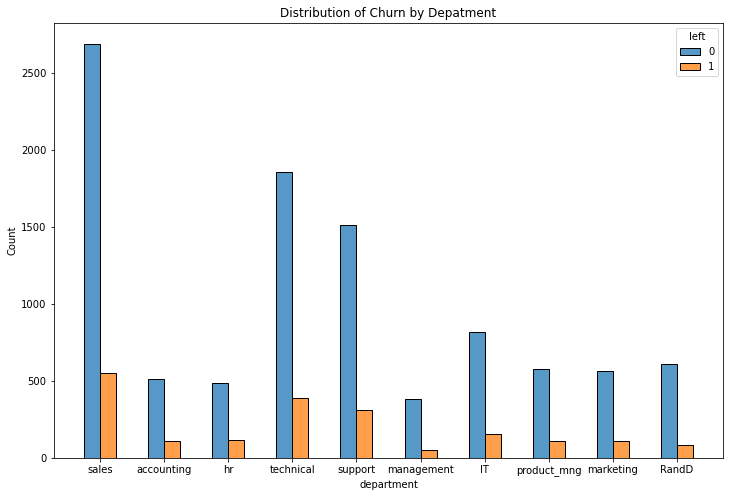

In [15]:
# Graph the distribution of departments comparing who left vs who stayed
plt.figure(figsize = (12, 8))
department = sns.histplot(data = df1, x = 'department', hue = 'left', multiple = 'dodge', shrink = 0.5)
department.set_title('Distribution of Churn by Depatment');

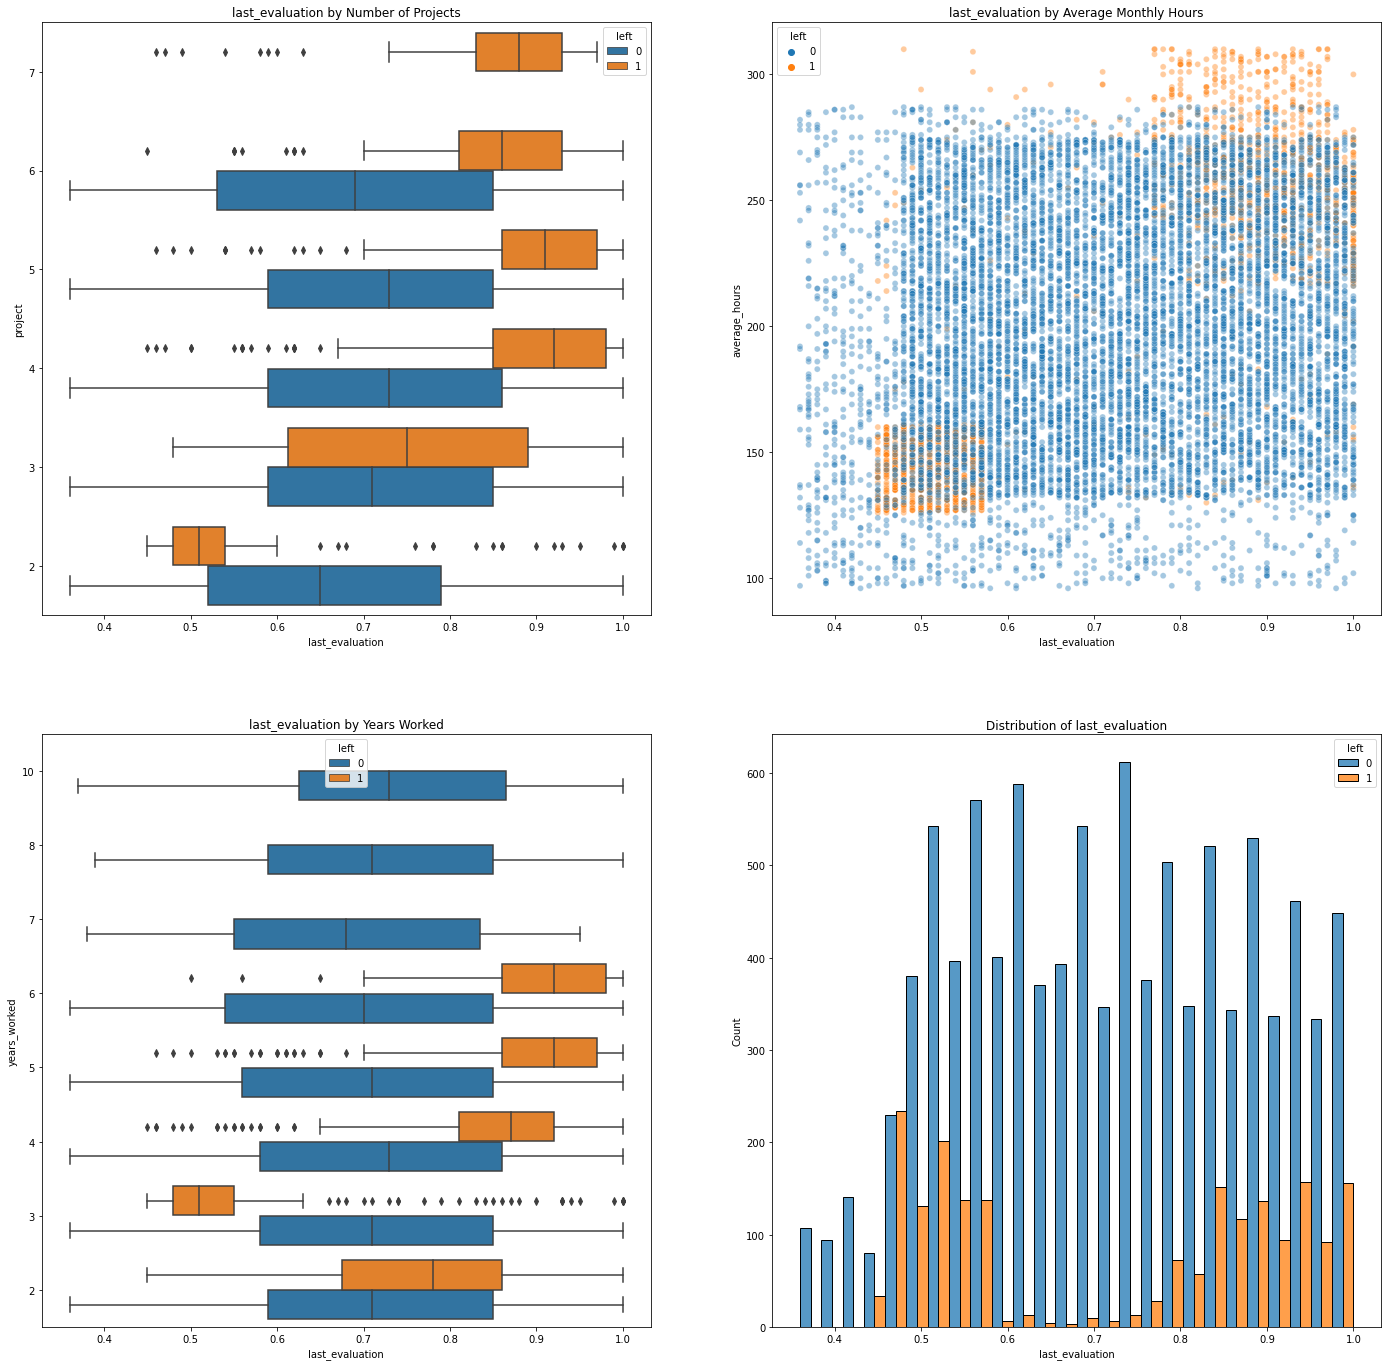

In [16]:
fig, axes = plt.subplots(2, 2, figsize = (24, 24))

sns.boxplot(data = df1, x = 'last_evaluation', y = 'project', orient = 'horizontal', hue = 'left', ax = axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('last_evaluation by Number of Projects')

sns.scatterplot(data = df1, x = 'last_evaluation', y = 'average_hours', hue = 'left', ax = axes[0, 1], alpha = 0.4)
axes[0, 1].set_title('last_evaluation by Average Monthly Hours')

sns.boxplot(data = df1, x = 'last_evaluation', y = 'years_worked', hue = 'left', orient = 'horizontal', ax = axes[1, 0])
axes[1, 0].invert_yaxis()
axes[1, 0].set_title('last_evaluation by Years Worked')

sns.histplot(data = df1, x = 'last_evaluation', multiple = 'dodge', hue = 'left', ax = axes[1, 1])
axes[1, 1].set_title('Distribution of last_evaluation');

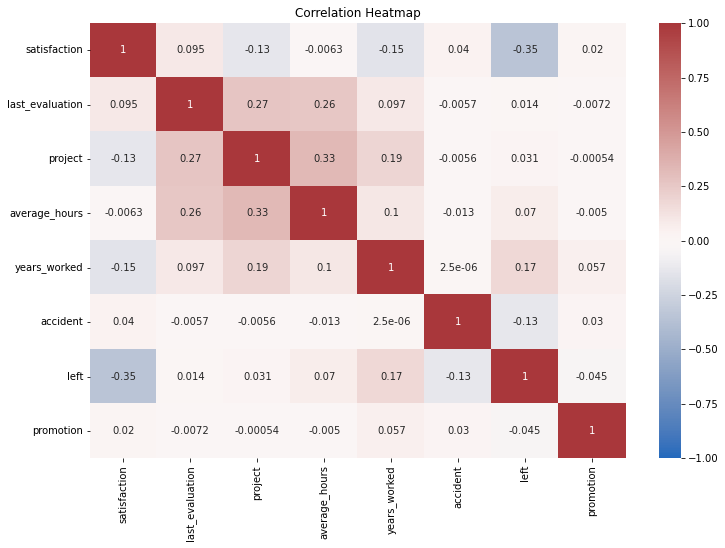

In [17]:
# Create a plot as needed
# Graph a correlation heatmap
plt.figure(figsize = (12, 8))
heatmap = sns.heatmap(data = df1.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette('vlag', as_cmap = True))
heatmap.set_title('Correlation Heatmap');

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Since we are predicting whether an employee left or stayed, we will compare the following binary classification models:
 - Logistic Regression
 - Decision Tree
 - Random Forest
 - Extreme Gradient Boosting

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Logistic Regression:

First we must convert categorical data into numerical data.  Since salary is ordinal, we will encode it as such.

In [18]:
# Convert salary to ordinal and department to dummy
df2 = df1.copy()
encoder = OrdinalEncoder(categories = [['low', 'medium', 'high']])
df2['salary'] = encoder.fit_transform(df2[['salary']])
df2 = pd.get_dummies(data = df2, drop_first = True)

Next we must remove outliers to mitigate skew.

In [19]:
# Find and remove outliers
df_logreg = df2[['satisfaction', 'last_evaluation', 'project', 'average_hours', 'years_worked']]
outliers = df_logreg.describe()
outliers

,satisfaction,last_evaluation,project,average_hours,years_worked
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857
std,0.241070,0.168343,1.163238,48.727813,1.330240
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [20]:
up_lim = outliers.loc['75%'] + (outliers.loc['75%'] - outliers.loc['25%']) * 1.5 
low_lim = outliers.loc['25%'] - (outliers.loc['75%'] - outliers.loc['25%']) * 1.5
for col in df_logreg.columns:
    df_logreg = df_logreg[(low_lim[col] <= df_logreg[col]) & (df_logreg[col] <= up_lim[col])]
df_logreg = df_logreg.join(df2['left']).reset_index(drop = True)

Now we can create the logistic regression model.

In [21]:
Y = df_logreg['left']
X = df_logreg.drop(columns = 'left')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 0)

In [22]:
log = LogisticRegression(random_state = 0)

In [23]:
log.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
log_pred = log.predict(X_test)

In [25]:
def test_results(model_name:str, test, pred):
    data = {'Model':model_name,
       'AUC':[metrics.roc_auc_score(test, pred)],
       'Accuracy':[metrics.accuracy_score(test, pred)],
       'Precision':[metrics.precision_score(test, pred, average = 'weighted')],
       'Recall':[metrics.recall_score(test, pred, average = 'weighted')],
       'F1':[metrics.f1_score(test, pred, average = 'weighted')]}
    results = pd.DataFrame(data = data)
    return results

In [26]:
log_results = test_results('log Reg', Y_test, log_pred)
log_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,log Reg,0.586844,0.82235,0.788915,0.82235,0.798144


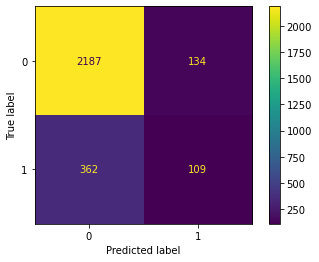

In [27]:
log_cm = metrics.confusion_matrix(Y_test, log_pred)
disp = metrics.ConfusionMatrixDisplay(log_cm, display_labels = log.classes_)
disp.plot(values_format = '');

In [28]:
Y = df2['left']
X = df2.drop(columns = 'left')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 0)

tree = DecisionTreeClassifier(random_state = 0)

In [29]:
cv_params_tree = {'max_depth':[2, 4, 6, None],
            'min_samples_leaf':[2, 5, 1],
            'min_samples_split':[2, 4, 6]}
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
tree1 = GridSearchCV(tree, cv_params_tree, scoring = scoring, cv = 5, refit = 'roc_auc')

In [30]:
tree1.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [31]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [32]:
def make_results(model_name:str, model_object, metric:str):
    metric_dict = {'auc':'mean_test_roc_auc',
                  'accuracy':'mean_test_accuracy',
                  'precision':'mean_test_precision',
                  'recall':'mean_test_recall',
                  'f1':'mean_test_f1'}
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    AUC = best_estimator_results.mean_test_roc_auc
    Accuracy = best_estimator_results.mean_test_accuracy
    Precision = best_estimator_results.mean_test_precision
    Recall = best_estimator_results.mean_test_recall
    F1 = best_estimator_results.mean_test_f1
    
    table = pd.DataFrame({'Model':[model_name],
                         'AUC':[AUC],
                         'Accuracy':[Accuracy],
                         'Precision':[Precision],
                         'Recall':[Recall],
                         'F1':[F1]})
    return table

In [33]:
tree_train_results = make_results('Decision Tree', tree1, 'auc')
tree_train_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Decision Tree,0.971936,0.98143,0.972227,0.914269,0.942307


In [34]:
# rf = RandomForestClassifier(random_state = 0)
# cv_params_forest = {'max_depth':[3, 5, None],
#                    'max_features':[1.0],
#                    'max_samples':[0.7, 1.0],
#                    'min_samples_leaf':[1, 2, 3],
#                    'min_samples_split':[2, 3, 4],
#                    'n_estimators':[300, 500]}
# rf1 = GridSearchCV(rf, cv_params_forest, scoring = scoring, cv = 5, refit = 'roc_auc')

In [35]:
# rf1.fit(X_train, Y_train)

In [36]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [37]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [38]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [39]:
# Write pickle
# write_pickle(path, rf1, 'rf1')

In [40]:
# Read pickle
rf1 = read_pickle(path, 'rf1')

In [41]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [42]:
rf_train_results = make_results('Random Forest', rf1, 'auc')
rf_train_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Random Forest,0.980212,0.976759,0.946647,0.911584,0.928735


In [43]:
train_results = pd.concat([tree_train_results, rf_train_results])
train_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Decision Tree,0.971936,0.981430,0.972227,0.914269,0.942307
0,Random Forest,0.980212,0.976759,0.946647,0.911584,0.928735


In [44]:
tree_pred = tree1.predict(X_test)
rf_pred = rf1.predict(X_test)

In [45]:
tree_results = test_results('Decision Tree', Y_test, tree_pred)  
tree_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Decision Tree,0.957239,0.982322,0.982216,0.982322,0.982123


In [46]:
rf_results = test_results('Random Forest', Y_test, rf_pred)
rf_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Random Forest,0.951419,0.97932,0.979148,0.97932,0.979078


In [47]:
test_results = pd.concat([log_results, tree_results, rf_results])
test_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,log Reg,0.586844,0.822350,0.788915,0.822350,0.798144
0,Decision Tree,0.957239,0.982322,0.982216,0.982322,0.982123
0,Random Forest,0.951419,0.979320,0.979148,0.979320,0.979078


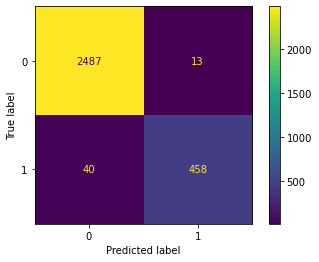

In [48]:
cm = metrics.confusion_matrix(Y_test, tree_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels = tree1.classes_)
disp.plot(values_format = '');

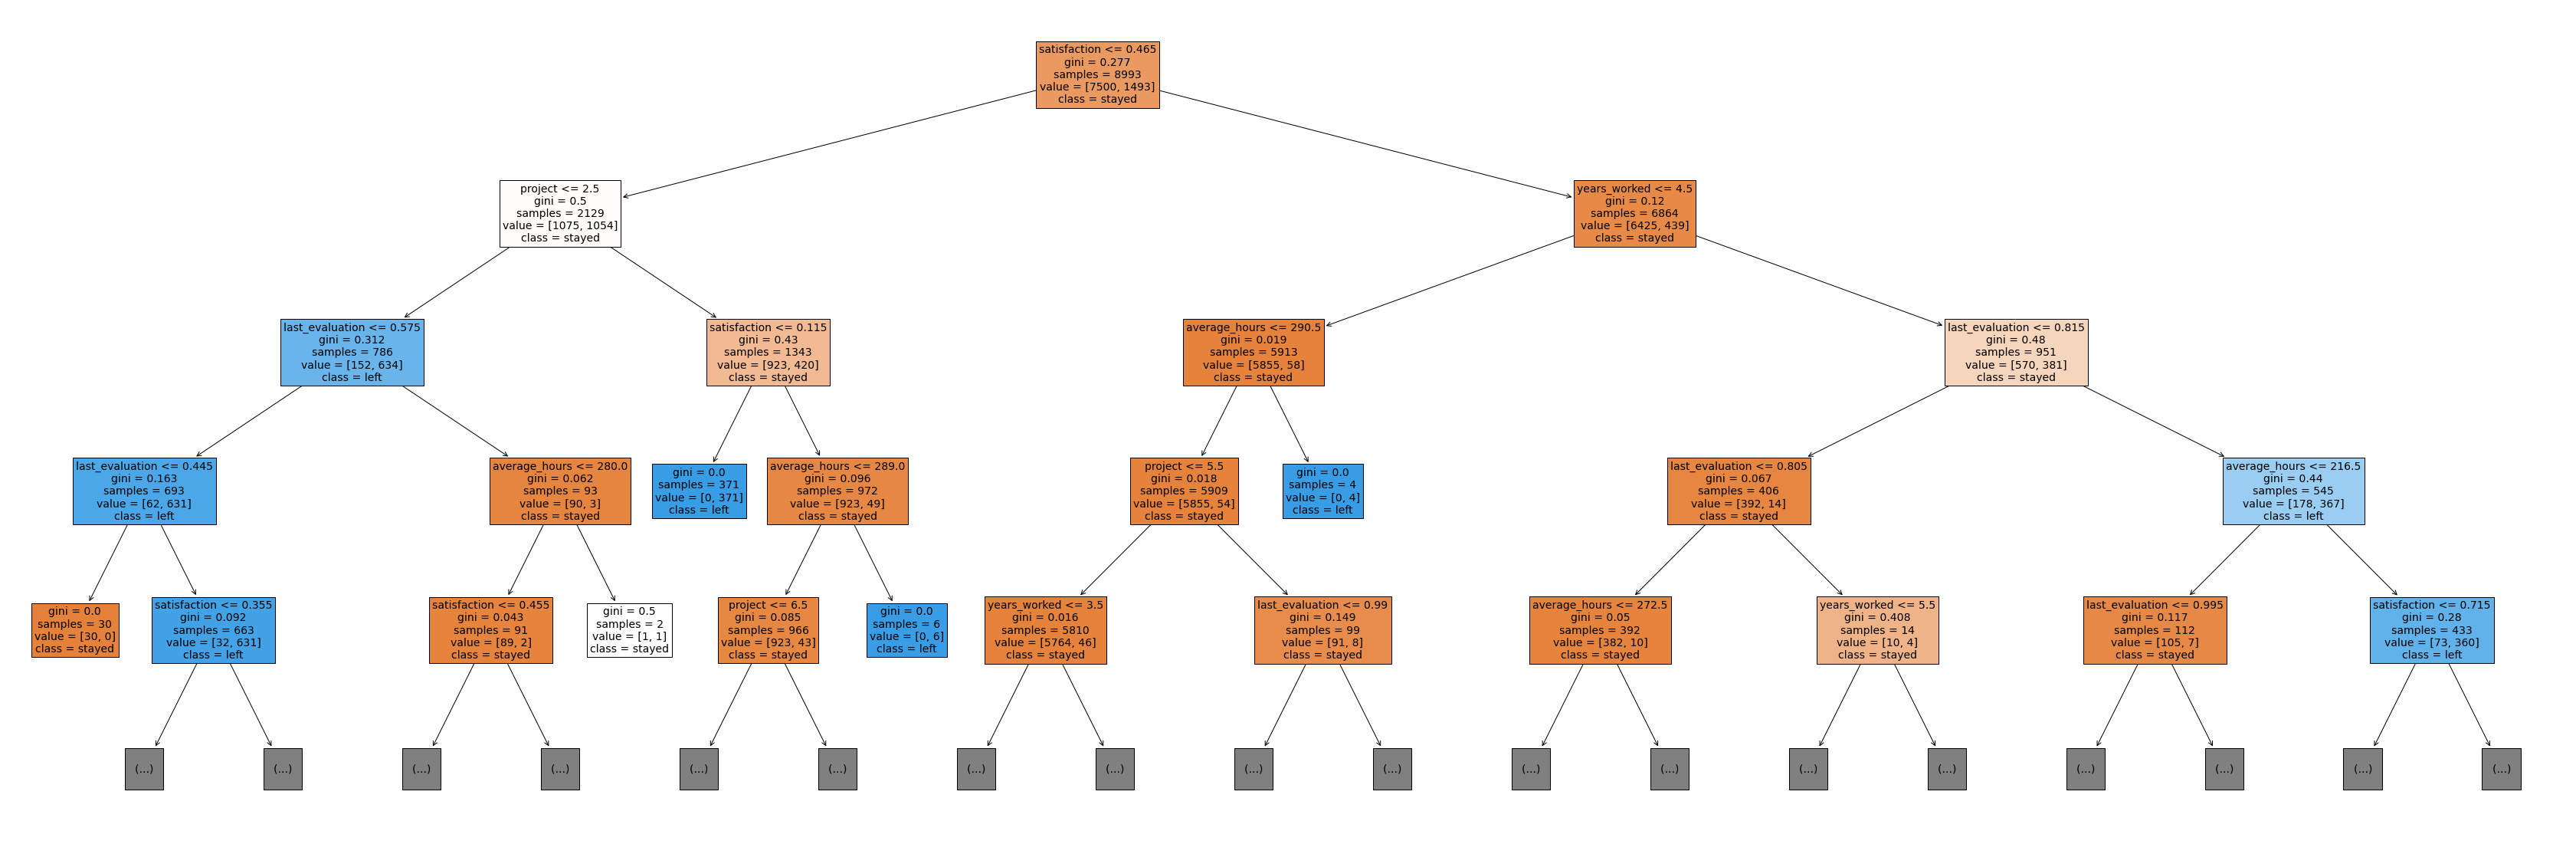

In [49]:
plt.figure(figsize = (60, 20))
plot_tree(tree1.best_estimator_, max_depth = 4, feature_names = X.columns, fontsize = 14, class_names = {0:'stayed', 1:'left'}, filled = True)
plt.show()

In [50]:
tree_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns = ['Gini Importances'], index = X.columns).sort_values(by = "Gini Importances", ascending = False)
rf_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, columns = ['Gini Importances'], index = X.columns).sort_values(by = 'Gini Importances', ascending = False)

Text(0.5, 1.0, 'Feature Importances for Random Forest')

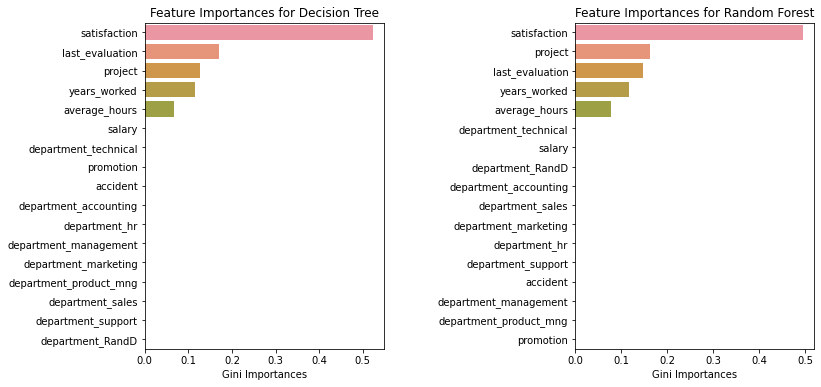

In [52]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
plt.subplots_adjust(wspace = 0.8)
sns.barplot(data = tree_importances, x = 'Gini Importances', y = tree_importances.index, ax = axes[0]);
axes[0].set_title('Feature Importances for Decision Tree')
sns.barplot(data = rf_importances, x = 'Gini Importances', y = rf_importances.index, ax = axes[1])
axes[1].set_title('Feature Importances for Random Forest');

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.